
## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## Übergewicht in verschiedenen Ländern
**Gruppenmitglieder:** Molignini Alessia, Keel Noëlle, Stettler Sara

### Fragestellung:
- "Welche drei Länder zeigen im Zeitraum von 1996 bis 2016 die grösste Zunahme der Prävalenz von Übergewicht in der Gesamtbevölkerung, unabhänig vom Geschlecht?"
- "Wo steht die Schweiz in diesem Vergleich?"
- "Welche Unterschiede gibt es in diesen vier Ländern zwischen Mann und Frau?"
### Datenquelle(n):
**Quellen:** 
- https://ourworldindata.org/grapher/obesity-in-men-vs-obesity-in-women
- https://ourworldindata.org/obesity (4. Darstellung,"What share of adults are obese?")

### 1. Daten beschaffen und laden

2. Datensatz

In [71]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
from matplotlib import colormaps

In [6]:
pd.set_option('display.max_rows', 10) 

In [7]:
df_zsm = pd.read_csv('share-of-adults-defined-as-obese.csv')

df_zsm

,Entity,Code,Year,"Prevalence of obesity among adults, BMI >= 30 (crude estimate) (%) - Sex: both sexes - Age group: 18+ years"
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5
...,...,...,...,...
8269,Zimbabwe,ZWE,2012,11.1
8270,Zimbabwe,ZWE,2013,11.3
8271,Zimbabwe,ZWE,2014,11.6
8272,Zimbabwe,ZWE,2015,11.9


In [8]:
df_zsm = pd.read_csv('share-of-adults-defined-as-obese.csv', skiprows=1,
                 names=['Land','Kürzel','Jahr','Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'])

df_zsm.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_18+_unabhängig_Geschlecht
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5


# -------------------------------------------------------------------------

1. Datensatz

In [9]:
# lade hier deine Daten
df_einzeln = pd.read_csv('obesity-in-men-vs-obesity-in-women.csv')

df_einzeln.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

,Entity,Code,Year,"Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: male - Age group: 18+ years","Prevalence of obesity among adults, BMI >= 30 (age-standardized estimate) (%) - Sex: female - Age group: 18+ years",World regions according to OWID
0,Afghanistan,AFG,1975,0.2,0.8,NaN
1,Afghanistan,AFG,1976,0.2,0.8,NaN
2,Afghanistan,AFG,1977,0.2,0.9,NaN
3,Afghanistan,AFG,1978,0.2,0.9,NaN
4,Afghanistan,AFG,1979,0.3,1.0,NaN


In [10]:
df_einzeln = pd.read_csv('obesity-in-men-vs-obesity-in-women.csv', skiprows=1,
                 names=['Land','Kürzel','Jahr','Übergewicht_Prävalenz_Männer_18+','Übergewicht_Prävalenz_Frauen_18+','Weltregionen_gemäss_OWID'])

df_einzeln.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+,Weltregionen_gemäss_OWID
0,Afghanistan,AFG,1975,0.2,0.8,NaN
1,Afghanistan,AFG,1976,0.2,0.8,NaN
2,Afghanistan,AFG,1977,0.2,0.9,NaN
3,Afghanistan,AFG,1978,0.2,0.9,NaN
4,Afghanistan,AFG,1979,0.3,1.0,NaN


## 2. Daten vorbereiten 
2.1 Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?     
2.2 Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?     
2.3 Welche Datentypen kommen in meinem Datensatz vor?    

- Beide Roh-Datensätze waren ursprünglich im Long Format und wurden für die Analyse ins Wide Format pivotiert. Im ersten Datensatz sind die Kolumnen so strukturiert, dass jede Kombination aus Jahr und Kategorie (Übergewicht Frauen/Männer) eine eigene Spalte darstellt.

- Das wide Format wurde verwendet um eine zeitliche Analyse (1996-2016) der Prävalenz durchzuführen. Ebenfalls wurde die Differenz von der Zunahme der Prävalenz dargestellt.

- Es kommen die Datentypen: object (Land, Kürzel, Weltregionen gemäss OWID), int64 (Jahr), float64 (Prävalenzwerte). Dabei sind object die Textfelder, int64 sind Ganzzahlen und float64 Fliesskommazahlen. Diese Datentypen geben an, dass im ersten Datensatz sowohl kategoriale (Text-)Daten als auch numerische Werte vorhanden sind.

In [11]:
df_einzeln.dtypes

Land                                 object
Kürzel                               object
Jahr                                  int64
Übergewicht_Prävalenz_Männer_18+    float64
Übergewicht_Prävalenz_Frauen_18+    float64
Weltregionen_gemäss_OWID             object
dtype: object

In [12]:
df_einzeln_pivot = df_einzeln.pivot_table(
    index='Land', 
    columns='Jahr', 
    values=['Übergewicht_Prävalenz_Männer_18+', 'Übergewicht_Prävalenz_Frauen_18+'])
df_einzeln_pivot.head() # head kann theoretisch gelöscht werden, dann zeigt es die obersten und untersten Daten an

Übergewicht_Prävalenz_Frauen_18+                                \
Jahr                                       1975  1976  1977  1978  1979  1980   
Land                                                                            
Afghanistan                                 0.8   0.8   0.9   0.9   1.0   1.1   
Africa (WHO)                                3.3   3.5   3.6   3.7   3.9   4.0   
Albania                                     8.6   8.8   8.9   9.1   9.3   9.5   
Algeria                                    10.7  11.1  11.4  11.8  12.2  12.7   
Americas (WHO)                             11.5  11.9  12.2  12.6  12.9  13.3   

                                        ... Übergewicht_Prävalenz_Männer_18+  \
Jahr            1981  1982  1983  1984  ...                             2007   
Land                                    ...                                    
Afghanistan      1.1   1.2   1.3   1.4  ...                              1.8   
Africa (WHO)     4.2   4.4   4.6   4.8  ...                              3.7   
Albania          9.7   9.9  10.1  10.3  ...                             15.5   
Algeria         13.1  13.6  14.1  14.6  ...                             14.0   
Americas (WHO)  13.7  14.1  14.5  14.9  ...                             21.1   

                                                                      
Jahr            2008  2009  2010  2011  2012  2013  2014  2015  2016  
Land                                                                  
Afghanistan      2.0   2.1   2.2   2.4   2.5   2.7   2.8   3.0   3.2  
Africa (WHO)     3.8   4.0   4.2   4.4   4.6   4.9   5.1   5.3   5.6  
Albania         16.1  16.8  17.4  18.1  18.8  19.5  20.2  20.9  21.6  
Algeria         14.6  15.2  15.8  16.5  17.1  17.8  18.5  19.2  19.9  
Americas (WHO)  21.6  22.2  22.7  23.2  23.7  24.3  24.8  25.4  25.9  

[5 rows x 84 columns]

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

Wenn die Werte auf einem Zahlenintervall liegen und bliebige Werte annehmen können, sind die kontinuierlich. Dies ist bei den Prävalenzwerten des ersten und zweiten Datensatzes der Fall. Wenn die Werte in festen Klassen oder Kategorien liegen, sind sie diskret. Bei unseren Datensätzen ist das Jahr, Kürzel und Land diskret.

**1. Datensatz**                  
Im ersten Datensatz sind 278 Länder (Klassen) mit ungleicher Verteilung (1-43 Datenpunkte pro Land), wobei die meisten Ländern 43 Datenpunkte zeigen. Es sind 258 verschiedene Landeskürzel im ersten Datensatz (nicht jedes Land ist mit einem Kürzel gekennzeichnet). Es sind nicht gleich viele Datenpunkte pro Landeskürzel vorhanden, wie schon bei den Ländern (ungleiche Verteilung). Die Rohdaten wurden über 43 Jahre erhoben (kontinuierlich). Pro Jahr wurden zwischen 1-271 Datenpunkte erhoben, wobei am meisten  197 Datenpunkte pro Jahr generieren konnten. Zwischen den Jahren 2017-2022 fehlen Datenpunkte (diskontinuierlich).

Analyse Prävalenz Frauen:
- Mittelwert: 15.42% der Frauen sind durchschnittlich übergewichtig
- Median: 13.9% der Frauen haben eine Prävalenz unterhlab oder gleich der Hälfte der Datenpunkte
- Standardabweichung: Die Werte streuen mit einer Abweichung von 11.25% um den Mittelwert
- Maximaler Wert: 63.3% (deutet auf extreme Werte in bestimmten Regionen oder Jahre hin)
- Der Histogrammplot zeigt eine überwiegend linkschiefe Vertielung (mehr Datenpunkt bei geringeren Prävalenzwerten). Der Mittelwert (15.42%) liegt leicht rechts des Medians (13.9%), was auf einige hohe Ausreisser hinweist. Die Breite des Histogramms beträgt 6.31 % mit 10 Bins.

Analyse Prävalenz Männer:
- Mittelwert: 9.26% der Männer sind durchschnittlich übergewichtig
- Median: 6.9%, die Mehrheit der Prävalenzwerte liegt im unteren Bereich
- Standardabweichung: Die Streuung beträgt 8.93%
- Maximaler Wert: 58.7% (ebenfalls extreme Werte)
- Verteilung zeigt ebenfalls eine Schiefe nach links, mit häufigen niedrigen Prävalenzwerten. Der Unterschied zwischen Mittelwert und Median zeigt auf weniger extreme Ausreisser hin. Die Breite der Balken des Histogramms beträgt 5.86% und hat 10 Bins.

Vergleich Frauen und Männer:          
Frauen weisen im Durchschnitt eine höhere Übergewichts-Prävalenz auf (15.42% vs. 9.26%). Die Prävalenz bei Frauen zeigt eine grössere Streuung als bei Männern. Extreme Werte (maximale Prävalenz) sind bei beiden Geschlechtern vorhanden, jedoch leicht höher bei den Frauen.

**2. Datensatz**             
Im zweiten Datensatz sind 197 Länder (Klassen) mit gleicher Verteilung (je 42 Datenpunkte pro Land). Es sind 191 Landeskürzel vorhanden (nicht jedes Land hat einen Landeskürzel). Pro Landeskürzel sind genau 42 Datenpunkte vorhanden (gleiche Verteilung). Die Daten wurden über 42 Jahre hinweg erhoben (kontinuierlich). Jedes Jahr hat genau 197 Datenpunkte (gleichmässige Verteilung). In diesem Datensatz fehlen keine Datenpunkte.

Analyse Prävalenz (unanhängig vom Geschlecht):       
- Mittelwert: Im Durchschnitt sind 11.87% der Bevölkerung übergewichtig
- Median: Die Hälfte der beobachteten Prävalenzwerte liegt unter oder bei 10.1%
- Standardabweichung: 9.7%, Die Werte streuen um den Mittelwert, wobei es eine breite Variation gibt
- Maximaler Wert: 60.7% (hohe Ausreisser)
- Die Verteilung zeigt eine Häufung niedriger Werte, mit ienem Schwerpunkt um den Median. Der Mittelwert liegt leicht über dem Median, was auf eine rechts-schiefe Verteilung hinweist (einige hohe Ausreisser). Die Balkenbreite beträgt 6.06% mit 10 Bins.



### 3.1 Analyse Länder

In [13]:
# 1.Datensatz
Anzahl_Länder = len(df_einzeln['Land'].unique())
print('Anzahl verschiedener Länder:', Anzahl_Länder)

Anzahl verschiedener Länder: 278


In [14]:
# 2.Datensatz
Anzahl_Länder = len(df_zsm['Land'].unique())
print('Anzahl verschiedener Länder:', Anzahl_Länder)

Anzahl verschiedener Länder: 197


In [15]:
#1.Datensatz
# Welches Land hat die meisten und wenigsten Datenpunkte?
df_einzeln['Land'].value_counts()

Land
Afghanistan         43
Panama              43
Marshall Islands    43
Mauritania          43
Mauritius           43
                    ..
Saint Barthelemy     1
Christmas Island     1
Cocos Islands        1
Reunion              1
Hong Kong            1
Name: count, Length: 278, dtype: int64

In [16]:
# 2.Datensatz
df_zsm['Land'].value_counts()


Land
Afghanistan    42
Nepal          42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Gambia         42
Georgia        42
Germany        42
Ghana          42
Zimbabwe       42
Name: count, Length: 197, dtype: int64

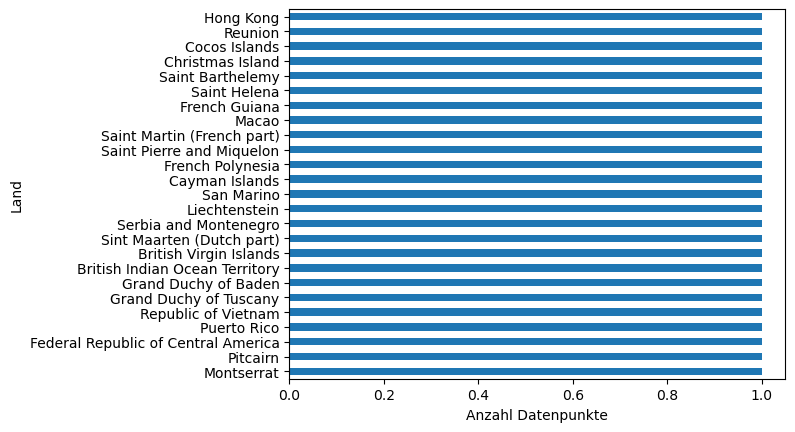

In [17]:
# 1.Datensatz
df_einzeln['Land'].value_counts().tail(25).plot(
    kind='barh', 
    xlabel='Anzahl Datenpunkte'); 

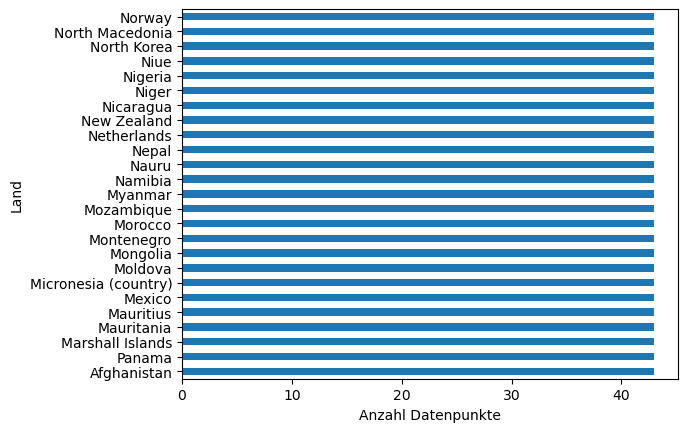

In [18]:
# 1.Datensatz
df_einzeln['Land'].value_counts().head(25).plot(
    kind='barh', 
    xlabel='Anzahl Datenpunkte'); 

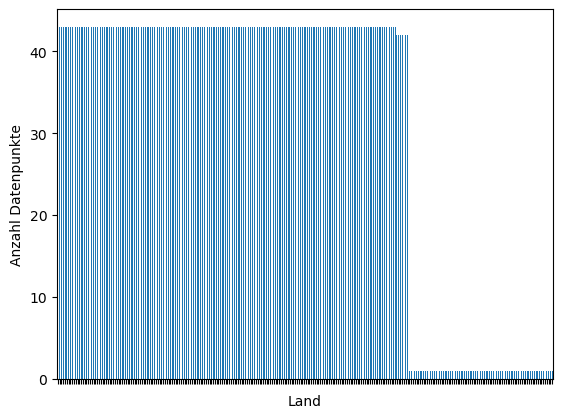

In [19]:
# 1.Datensatzw
Graph_1 = df_einzeln['Land'].value_counts().plot(kind='bar', ylabel='Anzahl Datenpunkte')
Graph_1.set_xticklabels([]); # löscht x-ticks labels (Ländernamen bei x Achse)


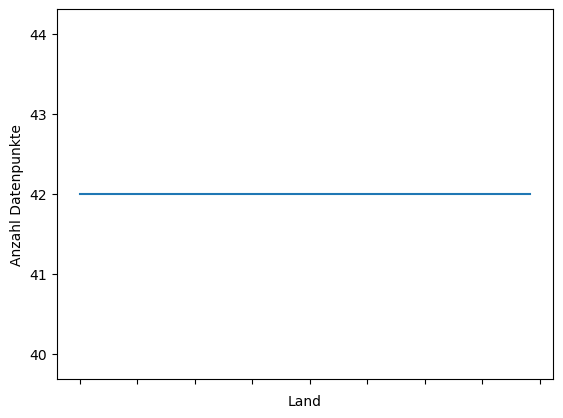

In [20]:
# 2.Datensatz
Graph_2 = df_zsm['Land'].value_counts().plot(ylabel='Anzahl Datenpunkte')
Graph_2.set_xticklabels([]); 

In [21]:
Anzahl_pro_Land = df_einzeln.groupby('Land').size()
Anzahl_43 = Anzahl_pro_Land[Anzahl_pro_Land == 43]
print(Anzahl_43)

Land
Afghanistan    43
Albania        43
Algeria        43
Andorra        43
Angola         43
               ..
Venezuela      43
Vietnam        43
Yemen          43
Zambia         43
Zimbabwe       43
Length: 190, dtype: int64


In [22]:
Anzahl_42 = Anzahl_pro_Land[Anzahl_pro_Land == 42]
print(Anzahl_42)

Land
Africa (WHO)                   42
Americas (WHO)                 42
Eastern Mediterranean (WHO)    42
Europe (WHO)                   42
South-East Asia (WHO)          42
Sudan (former)                 42
Western Pacific (WHO)          42
dtype: int64


In [23]:
Anzahl_1 = Anzahl_pro_Land[Anzahl_pro_Land == 1]

print(Anzahl_1)

Land
Aland Islands              1
American Samoa             1
Anguilla                   1
Aruba                      1
Austria-Hungary            1
                          ..
West Germany               1
Western Sahara             1
Yemen Arab Republic        1
Yemen People's Republic    1
Yugoslavia                 1
Length: 81, dtype: int64


### 3.2 Analyse Kürzel

In [24]:
# 1.Datensatz
Anzahl_Kürzel_1 = len(df_einzeln['Kürzel'].unique())

print('Anzahl verschiedener Landeskürzel:', Anzahl_Kürzel_1)

Anzahl verschiedener Landeskürzel: 258


In [25]:
# 1.Datensatz
df_einzeln['Kürzel'].value_counts()

Kürzel
AFG         43
MEX         43
MDA         43
MNG         43
MNE         43
            ..
GIB          1
SXM          1
OWID_ERE     1
MSR          1
PRI          1
Name: count, Length: 257, dtype: int64

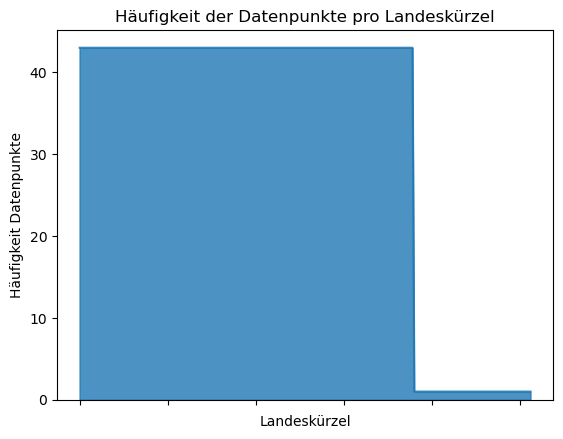

In [26]:
# 1.Datensatz
Graph_3 = df_einzeln['Kürzel'].value_counts().plot(
    kind='area', 
    xlabel='Landeskürzel', 
    ylabel='Häufigkeit Datenpunkte',
    title='Häufigkeit der Datenpunkte pro Landeskürzel',
    alpha=0.8)

Graph_3.set_xticklabels([]); 

###### 2. Datensatz

In [27]:
# 2.Datensatz
Anzahl_Kürzel_1 = len(df_zsm['Kürzel'].unique())

print('Anzahl verschiedener Landeskürzel:', Anzahl_Kürzel_1)

Anzahl verschiedener Landeskürzel: 191


In [28]:
# 2.Datensatz
df_zsm['Kürzel'].value_counts()

Kürzel
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

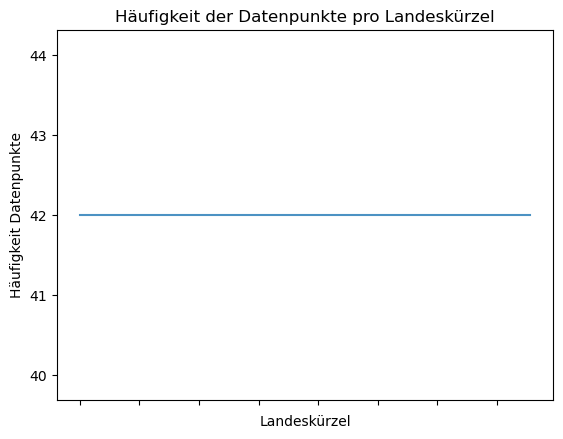

In [29]:
# 2.Datensatz
Graph_4 = df_zsm['Kürzel'].value_counts().plot(
    kind='line', 
    xlabel='Landeskürzel', 
    ylabel='Häufigkeit Datenpunkte',
    title='Häufigkeit der Datenpunkte pro Landeskürzel',
    alpha=0.8)

Graph_4.set_xticklabels([]); 

### 3.3 Analyse Jahr

In [30]:
Anzahl_Jahr_1 = len(df_einzeln['Jahr'].unique())
Anzahl_Jahr_2 = len(df_zsm['Jahr'].unique())

print('Anzahl verschiedener Jahreszahlen im ersten Datensatz:', Anzahl_Jahr_1)
print('Anzahl verschiedener Jahreszahlen im zweiten Datensatz:', Anzahl_Jahr_2)

Anzahl verschiedener Jahreszahlen im ersten Datensatz: 43
Anzahl verschiedener Jahreszahlen im zweiten Datensatz: 42


In [31]:
# 1.Datensatz
df_einzeln['Jahr'].value_counts().sort_values()

Jahr
1975    197
1985    197
1977    197
1978    197
1979    197
       ... 
2013    197
2014    197
2015    197
2008    197
2023    271
Name: count, Length: 43, dtype: int64

In [32]:
# 2.Datensatz
Graph_6 = df_zsm['Jahr'].value_counts().sort_values()
Graph_6

Jahr
1975    197
1994    197
1977    197
1978    197
1979    197
       ... 
2012    197
2013    197
2014    197
2007    197
2016    197
Name: count, Length: 42, dtype: int64

--> alle Jahre haben gleich viele Datenpunkte, sort.index() fällt weg bzw. ist überflüssig

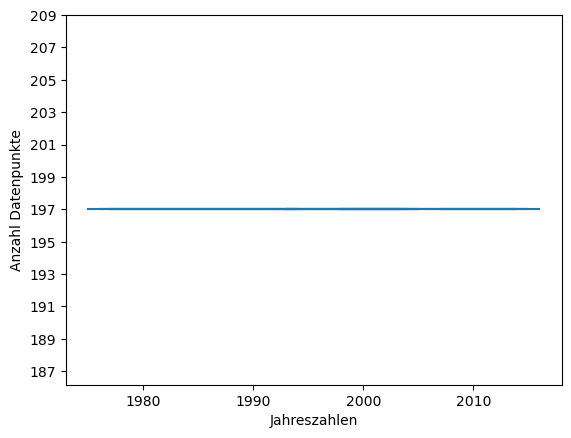

In [33]:
# 2.Datensatz
Graph_6.plot(
    kind = 'line',
    ylabel ='Anzahl Datenpunkte',
    xlabel ='Jahreszahlen'
); 

odd_ticks = [y for y in range(186, 210) if y % 2 != 0]
plt.yticks(odd_ticks); 

In [34]:
# 1.Datensatz
df_einzeln['Jahr'].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
       ... 
2013    197
2014    197
2015    197
2016    197
2023    271
Name: count, Length: 43, dtype: int64

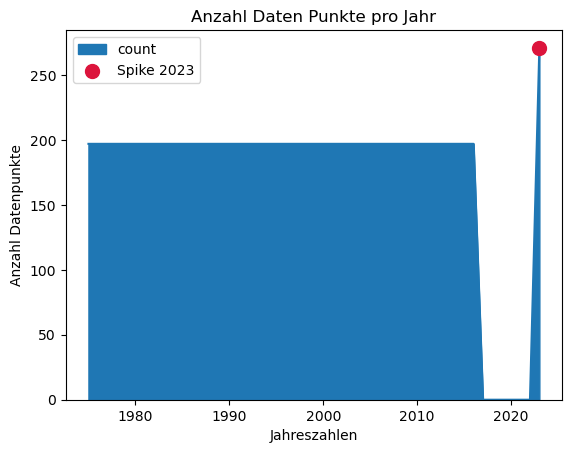

In [35]:
# 1.Datensatz

alle_jahre_1 = pd.RangeIndex(df_einzeln['Jahr'].min(), df_einzeln['Jahr'].max() + 1)
jahr_counts_1 = df_einzeln['Jahr'].value_counts().reindex(alle_jahre_1, fill_value=0)

Graph_5 = jahr_counts_1.plot(
    title = 'Anzahl Daten Punkte pro Jahr',
    kind='area',
    ylabel='Anzahl Datenpunkte',
    xlabel='Jahreszahlen'
)

plt.ylim(bottom=0)

if 2023 in jahr_counts_1.index:
    Graph_5.scatter(
        2023, jahr_counts_1[2023],
        color='crimson',    
        label='Spike 2023',
        zorder=5,        # Über der Linie zeichnen
        s=100            # Größe des Punktes
    )

Graph_5.legend(); 
# Legende umbennen!!

### 3.4 Analyse Prävalenz 

##### 1.Datensatz

In [36]:
df_einzeln.describe().round(2)

,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+
count,8545.00,8274.00,8274.00
mean,1996.37,9.26,15.42
std,12.86,8.93,11.25
min,1975.00,0.10,0.20
25%,1985.00,2.00,6.50
50%,1996.00,6.90,13.90
75%,2007.00,14.10,21.40
max,2023.00,58.70,63.30


In [37]:
Summe_Frauen = round(df_einzeln['Übergewicht_Prävalenz_Frauen_18+'].sum(),2)
Mittelwert_Frauen = round(df_einzeln['Übergewicht_Prävalenz_Frauen_18+'].mean(),2)
Median_Frauen = round(df_einzeln['Übergewicht_Prävalenz_Frauen_18+'].median(),2)
Standardabweichung_Frauen = round(df_einzeln['Übergewicht_Prävalenz_Frauen_18+'].std(),2)

print('Mittelwert:', Mittelwert_Frauen, 'Prozent der Frauen sind übergewichtig')
print('Summe:', Summe_Frauen)
print('Median:', Median_Frauen)
print('Standardabweichung:', Standardabweichung_Frauen)

Mittelwert: 15.42 Prozent der Frauen sind übergewichtig
Summe: 127556.3
Median: 13.9
Standardabweichung: 11.25


Die Breite eines Balkens beträgt: 6.309999999999999


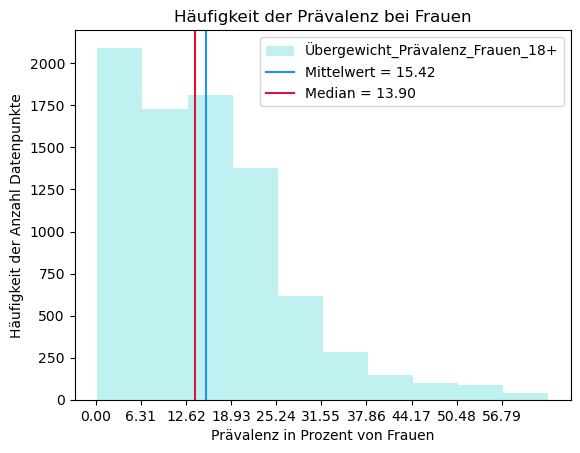

In [38]:
Histo_Frau = df_einzeln['Übergewicht_Prävalenz_Frauen_18+'].plot(
    color = 'paleturquoise',
    kind = 'hist',
    bins = 10, 
    alpha = 0.8,
    ylabel = 'Häufigkeit der Anzahl Datenpunkte',
    xlabel = 'Prävalenz in Prozent von Frauen',
    title = 'Häufigkeit der Prävalenz bei Frauen'
    )

Histo_Frau.axvline(x=df_einzeln['Übergewicht_Prävalenz_Frauen_18+'].mean(), 
                   color = 'dodgerblue',
                   label = f'Mittelwert = {Mittelwert_Frauen:.2f}')

Histo_Frau.axvline(x=df_einzeln['Übergewicht_Prävalenz_Frauen_18+'].median(), 
                   color = 'crimson',
                   label = f'Median = {Median_Frauen:.2f}')

plt.xticks(np.arange(0,60,6.309999999999999))

Histo_Frau.legend(); 

#Code um Balkenbreite herauszufinden, um Histogramm x-Achsenbeschriftung besser darzustellen
bar_width = Histo_Frau.patches[0].get_width()
print(f"Die Breite eines Balkens beträgt: {bar_width}")

In [39]:
Summe_Männer = round(df_einzeln['Übergewicht_Prävalenz_Männer_18+'].sum(),2)
Mittelwert_Männer = round(df_einzeln['Übergewicht_Prävalenz_Männer_18+'].mean(),2)
Median_Männer = round(df_einzeln['Übergewicht_Prävalenz_Männer_18+'].median(),2)
Standardabweichung_Männer = round(df_einzeln['Übergewicht_Prävalenz_Männer_18+'].std(),2)

print('Mittelwert:', Mittelwert_Männer, 'Prozent der Männer sind übergewichtig')
print('Summe:', Summe_Männer)
print('Median:', Median_Männer)
print('Standardabweichung:', Standardabweichung_Männer)

Mittelwert: 9.26 Prozent der Männer sind übergewichtig
Summe: 76634.1
Median: 6.9
Standardabweichung: 8.93


Die Breite eines Balkens beträgt: 5.86


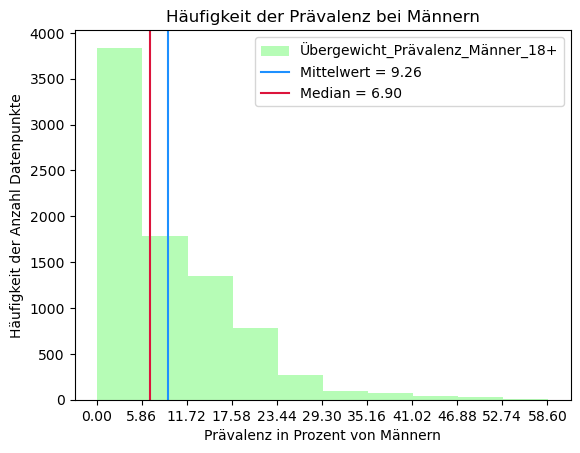

In [40]:
Histo_Mann = df_einzeln['Übergewicht_Prävalenz_Männer_18+'].plot(
    color = 'palegreen',
    title = 'Häufigkeit der Prävalenz bei Männern',
    kind = 'hist',
    bins = 10, 
    alpha = 0.7,
    ylabel = 'Häufigkeit der Anzahl Datenpunkte',
    xlabel = 'Prävalenz in Prozent von Männern',
    )

Histo_Mann.axvline(x=df_einzeln['Übergewicht_Prävalenz_Männer_18+'].mean(), 
                   color = 'dodgerblue',
                   label = f'Mittelwert = {Mittelwert_Männer:.2f}')

Histo_Mann.axvline(x=df_einzeln['Übergewicht_Prävalenz_Männer_18+'].median(), 
                   color = 'crimson',
                   label = f'Median = {Median_Männer:.2f}')

plt.xticks(np.arange(0,60,5.86))

Histo_Mann.legend(); 

#Code um Balkenbreite herauszufinden, um Histogramm x-Achsenbeschriftung besser darzustellen
bar_width = Histo_Mann.patches[0].get_width()
print(f"Die Breite eines Balkens beträgt: {bar_width}")

##### 2.Datensatz

In [41]:
df_zsm.describe().round(2)

,Jahr,Übergewicht_Prävalenz_18+_unabhängig_Geschlecht
count,8274.00,8274.00
mean,1995.50,11.87
std,12.12,9.70
min,1975.00,0.10
25%,1985.00,3.90
50%,1995.50,10.10
75%,2006.00,17.70
max,2016.00,60.70


In [42]:
Summe_zsm = round(df_zsm['Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'].sum(),2)
Mittelwert_zsm = round(df_zsm['Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'].mean(),2)
Median_zsm = round(df_zsm['Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'].median(),2)
Standardabweichung_zsm = round(df_zsm['Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'].std(),2)

print('Mittelwert:', Mittelwert_zsm, 'Prozent der Bevölkerung sind übergewichtig')
print('Summe:', Summe_zsm)
print('Median:', Median_zsm)
print('Standardabweichung:', Standardabweichung_zsm)

Mittelwert: 11.87 Prozent der Bevölkerung sind übergewichtig
Summe: 98184.2
Median: 10.1
Standardabweichung: 9.7


Die Breite eines Balkens beträgt: 6.0600000000000005


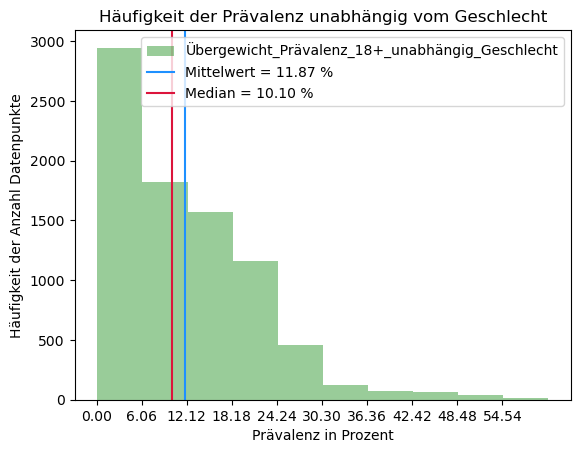

In [43]:
Histo_zsm = df_zsm['Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'].plot(
    color = 'green',
    title = 'Häufigkeit der Prävalenz unabhängig vom Geschlecht',
    kind = 'hist',
    bins = 10, 
    alpha = 0.4,
    ylabel = 'Häufigkeit der Anzahl Datenpunkte',
    xlabel = 'Prävalenz in Prozent',
    )

Histo_zsm.axvline(x=df_zsm['Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'].mean(), 
                   color = 'dodgerblue',
                   label = f'Mittelwert = {Mittelwert_zsm:.2f} %')

Histo_zsm.axvline(x=df_zsm['Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'].median(), 
                   color = 'crimson',
                   label = f'Median = {Median_zsm:.2f} %')

plt.xticks(np.arange(0,60,6.0600000000000005))

Histo_zsm.legend(); 

#Code um Balkenbreite herauszufinden, um Histogramm x-Achsenbeschriftung besser darzustellen
bar_width = Histo_zsm.patches[0].get_width()
print(f"Die Breite eines Balkens beträgt: {bar_width}")

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



Analyse
Interpretation

In [44]:
df_einzeln = df_einzeln.drop(columns=['Weltregionen_gemäss_OWID'])
df_einzeln

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+
0,Afghanistan,AFG,1975,0.2,0.8
1,Afghanistan,AFG,1976,0.2,0.8
2,Afghanistan,AFG,1977,0.2,0.9
3,Afghanistan,AFG,1978,0.2,0.9
4,Afghanistan,AFG,1979,0.3,1.0
...,...,...,...,...,...
8540,Zimbabwe,ZWE,2013,4.2,23.9
8541,Zimbabwe,ZWE,2014,4.4,24.4
8542,Zimbabwe,ZWE,2015,4.5,24.8
8543,Zimbabwe,ZWE,2016,4.7,25.3


In [45]:
print(df_einzeln.columns)
print(df_zsm.columns)

Index(['Land', 'Kürzel', 'Jahr', 'Übergewicht_Prävalenz_Männer_18+',
       'Übergewicht_Prävalenz_Frauen_18+'],
      dtype='object')
Index(['Land', 'Kürzel', 'Jahr',
       'Übergewicht_Prävalenz_18+_unabhängig_Geschlecht'],
      dtype='object')


In [46]:
df_kombi = pd.merge(df_einzeln, df_zsm, on=['Land', 'Jahr', 'Kürzel'], how='outer')
df_kombi

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+,Übergewicht_Prävalenz_18+_unabhängig_Geschlecht
0,Afghanistan,AFG,1975,0.2,0.8,0.4
1,Afghanistan,AFG,1976,0.2,0.8,0.4
2,Afghanistan,AFG,1977,0.2,0.9,0.5
3,Afghanistan,AFG,1978,0.2,0.9,0.5
4,Afghanistan,AFG,1979,0.3,1.0,0.5
...,...,...,...,...,...,...
8540,Zimbabwe,ZWE,2013,4.2,23.9,11.3
8541,Zimbabwe,ZWE,2014,4.4,24.4,11.6
8542,Zimbabwe,ZWE,2015,4.5,24.8,11.9
8543,Zimbabwe,ZWE,2016,4.7,25.3,12.3


***Wir haben bemerkt, dass die Prävalenz unabhängig des Geschlechts (Durchschnitt von Mann und Frau), nicht mit unseren vorhanenden Daten übereinstimmt. (wahrscheinlich wurden andere Daten erhoben) --> deshalb haben wir die Daten von Hand ausgerechnet, damit wir uns auf die Daten des ersten Datensatzes verlassen können***

In [47]:
df_einzeln['Durchschnitt_Prävalenz_18+_ausgerechnet'] = ((df_einzeln['Übergewicht_Prävalenz_Frauen_18+']+df_einzeln['Übergewicht_Prävalenz_Männer_18+'])/2).round(1)

df_einzeln

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+,Durchschnitt_Prävalenz_18+_ausgerechnet
0,Afghanistan,AFG,1975,0.2,0.8,0.5
1,Afghanistan,AFG,1976,0.2,0.8,0.5
2,Afghanistan,AFG,1977,0.2,0.9,0.6
3,Afghanistan,AFG,1978,0.2,0.9,0.6
4,Afghanistan,AFG,1979,0.3,1.0,0.6
...,...,...,...,...,...,...
8540,Zimbabwe,ZWE,2013,4.2,23.9,14.0
8541,Zimbabwe,ZWE,2014,4.4,24.4,14.4
8542,Zimbabwe,ZWE,2015,4.5,24.8,14.6
8543,Zimbabwe,ZWE,2016,4.7,25.3,15.0


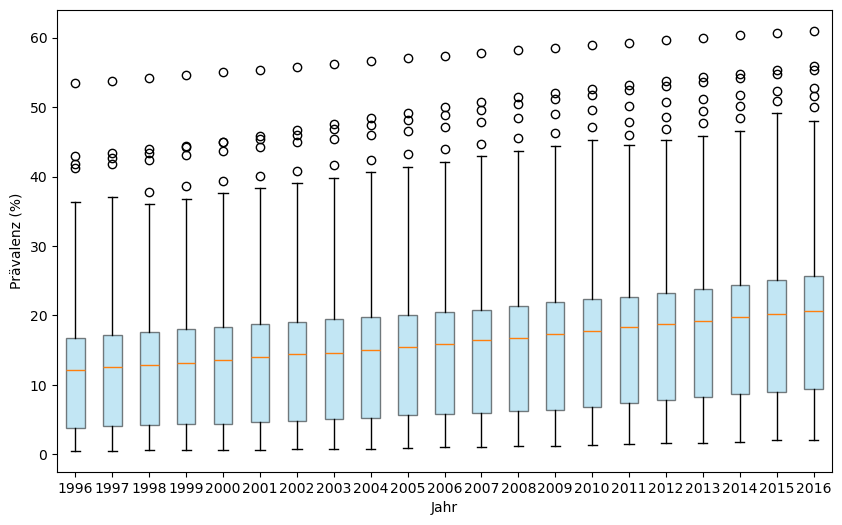

In [48]:
Start_Jahr = 1996
End_Jahr = 2016

df_einzeln_gefiltert = df_einzeln[(df_einzeln['Jahr']>= Start_Jahr) & (df_einzeln['Jahr'] <= End_Jahr)]

gruppiert = df_einzeln_gefiltert.groupby('Jahr')['Durchschnitt_Prävalenz_18+_ausgerechnet'].apply(list)

fig, box_1 = plt.subplots(figsize=(10, 6))
bplot = box_1.boxplot(gruppiert, patch_artist=True)
colors = ['skyblue'] * len(gruppiert)
alpha = 0.5
for patch, color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
    patch.set_alpha(alpha)

box_1.set_xticklabels(gruppiert.index)

box_1.set_ylabel('Prävalenz (%)')
box_1.set_xlabel('Jahr'); 


In [49]:
df_einzeln_pivot = df_einzeln.pivot_table(index='Land', columns='Jahr', values='Durchschnitt_Prävalenz_18+_ausgerechnet')
df_einzeln_pivot

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Land,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.8,0.8,0.9,...,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.9,5.2,5.4
Africa (WHO),2.0,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.8,2.9,...,7.7,8.0,8.2,8.6,8.9,9.1,9.5,9.8,10.1,10.4
Albania,6.5,6.7,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.3,...,16.5,17.0,17.6,18.2,18.8,19.4,20.0,20.5,21.1,21.7
Algeria,6.8,7.0,7.2,7.5,7.8,8.2,8.4,8.8,9.2,9.6,...,21.4,22.0,22.7,23.4,24.0,24.7,25.4,26.0,26.7,27.4
Americas (WHO),9.4,9.8,10.0,10.4,10.7,11.0,11.4,11.8,12.1,12.5,...,23.8,24.2,24.8,25.3,25.8,26.3,26.8,27.4,28.0,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,1.0,1.2,1.2,1.3,1.4,1.6,1.6,1.8,2.0,2.1
Western Pacific (WHO),0.8,0.8,0.8,0.8,1.0,1.0,1.0,1.0,1.1,1.2,...,4.0,4.2,4.4,4.6,4.9,5.2,5.4,5.8,6.1,6.4
Yemen,2.7,2.8,2.9,3.1,3.2,3.4,3.6,3.8,4.0,4.2,...,11.8,12.4,12.8,13.4,13.9,14.5,15.1,15.7,16.4,17.0


In [50]:
print(df_einzeln_pivot.columns)

Index([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Jahr')


In [51]:
Differenz_Durchschnitt = df_einzeln_pivot[2016] - df_einzeln_pivot[1996]
Differenz_Durchschnitt = Differenz_Durchschnitt.sort_values()
Differenz_Durchschnitt

Land
Vietnam          1.6
Singapore        2.0
South Korea      2.2
Japan            2.4
India            2.6
                ... 
Tonga           14.0
Cook Islands    14.1
Kiribati        14.6
Tuvalu          15.3
Niue            15.4
Length: 197, dtype: float64

Auffallend: Alles Länder gestiegen.

In [52]:
interaktives_Diagramm = px.bar(Differenz_Durchschnitt, x=Differenz_Durchschnitt.index, y=Differenz_Durchschnitt.values,
             labels={'x': 'Länder', 'y': 'Differenz der Prävalenz in %'},
             title='Differenz der Prävalenz zwischen 2016 und 1996 nach Land')

interaktives_Diagramm.update_layout(
    xaxis={'showticklabels':False}
)

interaktives_Diagramm

In [53]:
Durchschnitt_Schweiz = df_einzeln_pivot.loc['Switzerland']

Differenz_Durchschnitt_Schweiz = Durchschnitt_Schweiz[2016] - Durchschnitt_Schweiz[1996]
print('Die Prävalenz in der Schweiz ist von 1996 bis 2016, unabhängig vom Geschlecht, um', Differenz_Durchschnitt_Schweiz,'%' , 'gestiegen.')

Die Prävalenz in der Schweiz ist von 1996 bis 2016, unabhängig vom Geschlecht, um 7.0 % gestiegen.


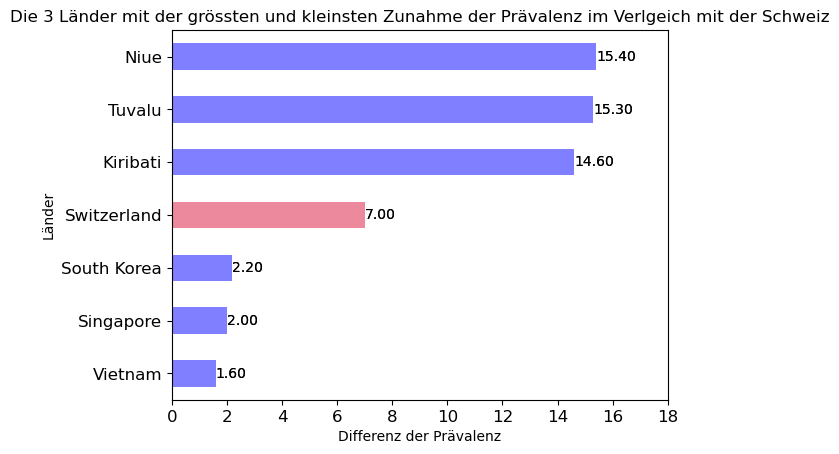

In [54]:
obersten_3 = Differenz_Durchschnitt.head(3)
tiefsten_3 = Differenz_Durchschnitt.tail(3)

if 'Switzerland' in Differenz_Durchschnitt.index:
    Schweiz = Differenz_Durchschnitt['Switzerland']
else:
    Schweiz = None

if Schweiz is not None:
    ausgewählte_Länder = pd.concat([obersten_3, pd.Series({'Switzerland': Schweiz}), tiefsten_3])
else:
    ausgewählte_Länder = pd.concat([obersten_3, tiefsten_3])

farben = ['crimson' if land == 'Switzerland' else 'blue' for land in ausgewählte_Länder.index]

ax = ausgewählte_Länder.plot(
    kind = 'barh',
    color = farben,
    alpha = 0.5,
    title = 'Die 3 Länder mit der grössten und kleinsten Zunahme der Prävalenz im Verlgeich mit der Schweiz',
    xlabel = 'Differenz der Prävalenz',
    ylabel = 'Länder', fontsize = 12
); 

for i, bar in enumerate(ax.patches):
    width = bar.get_width()  # Breite des Balkens
    height = bar.get_height()  # Höhe des Balkens
    y_position = bar.get_y() + height / 2  # Berechne die Position in der Mitte des Balkens
    ax.text(width, y_position, f'{width:.2f}', va='center', ha='left', fontsize=10, color='black')

ax.bar_label(ax.containers[0], fmt='%.2f')
ax.set_xlim(right=max(ausgewählte_Länder) + 1)

ax.set_xlim(0, 18); 

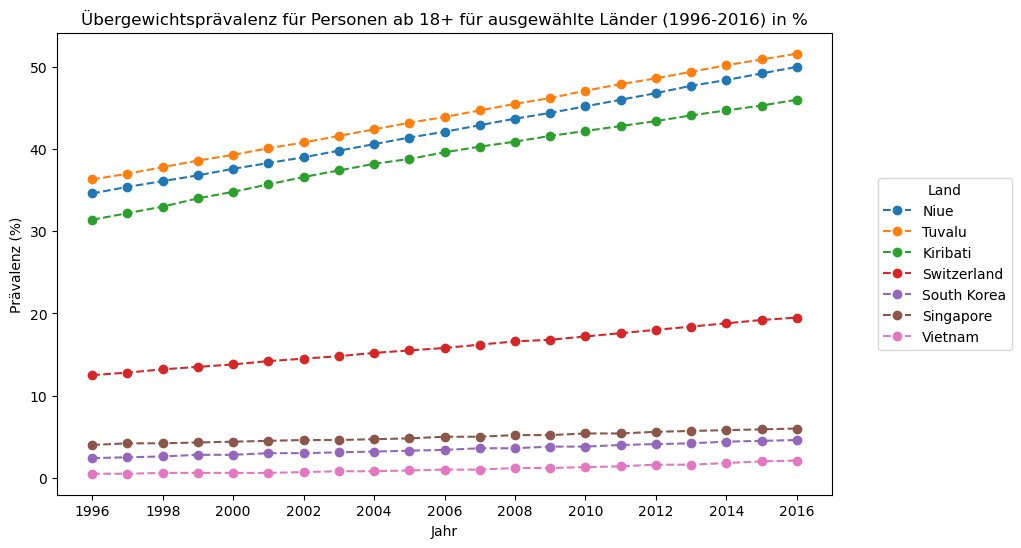

In [55]:
Start_Jahr = 1996
End_Jahr = 2016
ausgewählte_Länder = ['Niue', 'Tuvalu', 'Kiribati', 'Switzerland', 'South Korea', 'Singapore', 'Vietnam']

df_einzeln_7_Länder = df_einzeln[(df_einzeln['Jahr']>= Start_Jahr) & (df_einzeln['Jahr'] <= End_Jahr)]
df_einzeln_7_Länder = df_einzeln_7_Länder[df_einzeln_7_Länder['Land'].isin(ausgewählte_Länder)]

gruppiert = df_einzeln_7_Länder.groupby(['Land', 'Jahr'])['Durchschnitt_Prävalenz_18+_ausgerechnet'].mean()
gruppiert = gruppiert.unstack(level='Land')

fig, lin_1 = plt.subplots(figsize=(10, 6))

for land in ausgewählte_Länder:
    if land in gruppiert.columns:
        lin_1.plot(gruppiert.index, gruppiert[land], label=land, marker='o', linestyle='--', markersize=6)

lin_1.set_xlabel('Jahr')
lin_1.set_ylabel('Prävalenz (%)')
lin_1.set_title('Übergewichtsprävalenz für Personen ab 18+ für ausgewählte Länder (1996-2016) in %')
lin_1.set_xlim(Start_Jahr-1, End_Jahr+1)
lin_1.set_xticks(range(Start_Jahr, End_Jahr+1,2))

lin_1.legend(title='Land', loc='center left', bbox_to_anchor=(1.05, 0.5)); 




In [56]:
df_gefiltert = df_einzeln[(df_einzeln['Land'].isin(['Niue', 'Tuvalu', 'Kiribati', 'Switzerland', 'South Korea', 'Singapore', 'Vietnam'])) & (df_einzeln['Jahr'].isin([1996, 2016]))]
del df_gefiltert['Durchschnitt_Prävalenz_18+_ausgerechnet']
df_gefiltert

,Land,Kürzel,Jahr,Übergewicht_Prävalenz_Männer_18+,Übergewicht_Prävalenz_Frauen_18+
4099,Kiribati,KIR,1996,25.6,37.1
4119,Kiribati,KIR,2016,41.6,50.4
5657,Niue,NIU,1996,27.9,41.4
5677,Niue,NIU,2016,44.8,55.1
6876,Singapore,SGP,1996,3.0,5.1
...,...,...,...,...,...
7457,Switzerland,CHE,2016,22.2,16.9
7913,Tuvalu,TUV,1996,29.6,43.0
7933,Tuvalu,TUV,2016,47.0,56.2
8346,Vietnam,VNM,1996,0.3,0.7


In [79]:

df_gefiltert.loc[:,'Land_Jahr'] = df_gefiltert['Land'] + " (" + df_gefiltert['Jahr'].astype(str) + ")"

interaktives_Diagramm_3 = px.bar(
    df_gefiltert,
    x='Land_Jahr', 
    y=['Übergewicht_Prävalenz_Männer_18+', 'Übergewicht_Prävalenz_Frauen_18+'],
    labels={
        'value': 'Prävalenz in %',
        'variable': 'Geschlecht',
        'Land_Jahr': 'Länder (Jahr)'},
    title='Prävalenz von Übergewicht (Männer vs. Frauen, nach Jahr und Land)',
    color='variable',
    color_discrete_sequence=['turquoise', 'salmon'])

interaktives_Diagramm_3
